# TASKS:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. 
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

In [1]:
# Library load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Data load
df=pd.read_csv("F:/EXCELR/Assignments/7-Multiple Linear Regression/ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
#Check few columns
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.shape

(1436, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


# Summary :
The dataset contains 1436 observations and 11 variables, with no missing values across any column. 

Out of the 11 features, 10 are numeric (int64), and 1 is categorical (object type). 

Price is the target variable and is numeric.

Fuel_Type is the only categorical feature and must be encoded before modeling.

Automatic is binary (0/1) and can be used directly.

Doors is numeric but represents a categorical attribute and should be treated via one-hot encoding.

Cylinders has no variability (constant values) and provides no predictive value, so it should be removed.

Gears shows very low variability and is also a low-value feature for regression; recommended to drop.

All other numerical attributes (Age_08_04, KM, HP, cc, Weight) are valid continuous predictors.

In [6]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


# Overall Insights

Dataset is complete — no missing values.

Several columns show strong outliers (KM, cc, Price).

Cylinders should be dropped (constant).

Gears should be dropped (almost constant).

Doors is categorical disguised as numeric → needs encoding.

Fuel_Type requires One-Hot Encoding.

Price, Age, KM, Weight show natural variation suitable for MLR.

In [7]:
# drop Gears and Cylinders due to no variation
df.drop(["Cylinders", "Gears"], axis=1, inplace=True)

In [8]:
# No of null values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Weight       0
dtype: int64

#  No null values found

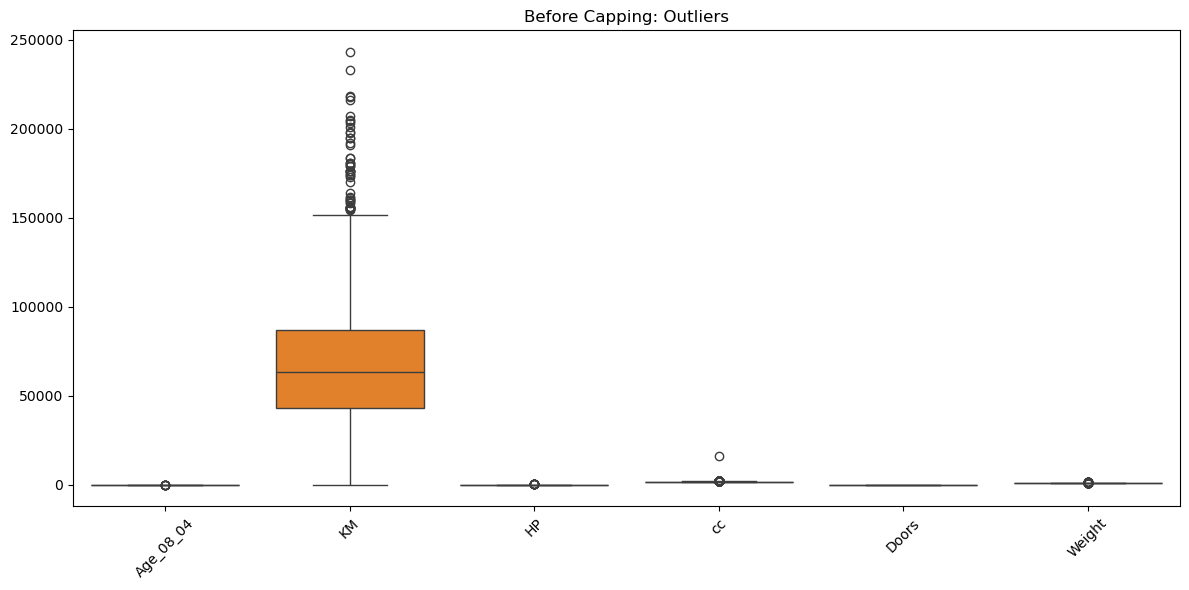

In [9]:
# Box plot
b_cols=[col for col in df.columns if col not in ["Price", "Fuel_Type", "Automatic"]]
#save_path = ("F:/EXCELR/Assignemnts/7-Multiple Linear Regression/Before_capping_boxplot.png")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[b_cols])
plt.title("Before Capping: Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Conclusions from the  box Plot

KM has the largest and most frequent outliers (hundreds of extreme values).

cc contains extreme single-point outliers (e.g., 16,000 cc).

HP has a few strong outliers above typical horsepower levels.

Weight has moderate but meaningful outliers.

Age_08_04 is relatively clean—minimal outliers.


In [10]:
# no of zeros
(df==0).sum()

Price           0
Age_08_04       0
KM              0
Fuel_Type       0
HP              0
Automatic    1356
cc              0
Doors           0
Weight          0
dtype: int64

Dataset is very clean overall.

Only one problematic column: Automatic, which has too many missing values to be useful.

We can safely drop it and proceed with:

Outlier handling

One-hot encoding for Doors & Fuel_Type

VIF

Regression modeling

In [11]:
# Stat summary 
num_df = df.select_dtypes(include=['int64', 'float64'])
stat_summary = num_df.describe().T
stat_summary["IQR"] = stat_summary["75%"] - stat_summary["25%"]
stat_summary["Skew"] = num_df.skew()
stat_summary["Kurtosis"] = num_df.kurtosis()
stat_summary = stat_summary[["mean", "50%", "Skew", "Kurtosis", "IQR", "std"]].round(3)

print("stat_summary:\n", stat_summary)

stat_summary:
                 mean      50%    Skew  Kurtosis       IQR        std
Price      10730.825   9900.0   1.704     3.738   3500.00   3626.965
Age_08_04     55.947     61.0  -0.827    -0.077     26.00     18.600
KM         68533.260  63389.5   1.016     1.685  44020.75  37506.449
HP           101.502    110.0   0.956     8.836     20.00     14.981
Automatic      0.056      0.0   3.878    13.059      0.00      0.229
cc          1576.856   1600.0  27.432   930.711    200.00    424.387
Doors          4.033      4.0  -0.076    -1.875      2.00      0.953
Weight      1072.460   1070.0   3.109    19.363     45.00     52.641


# Overall Conclusions:

Price shows strong right skewness (Skew = 1.704) and heavy tails (Kurtosis = 3.738), indicating presence of expensive-car outliers that influence distribution.

Age_08_04 is fairly symmetric (Skew = –0.827) with near-normal kurtosis (–0.077) and a moderate spread (IQR = 26 months), suggesting predictable depreciation patterns.

KM is moderately right-skewed (Skew = 1.016) with a very large spread (IQR = 44,020 km), confirming the existence of high-mileage outliers.

HP shows visible outlier behavior (Kurtosis = 8.836) and mild right skew (Skew = 0.956), indicating some unusually high-performance engines present.

Automatic is extremely imbalanced (Mean = 0.056, Skew = 3.878). With almost 94.4% values = 0, this feature offers negligible predictive power and should be removed.

cc (Engine Capacity) contains extreme outliers, reflected by Skew = 27.432 and Kurtosis = 930.711 — both unusually high values. This confirms cc must undergo strict outlier capping or be excluded from modeling if instability persists.

Doors is essentially categorical, even though numeric. Its distribution is symmetric (Skew = –0.076) with low variability (Std = 0.953). It needs One-Hot Encoding to avoid misleading linear interpretations.

Weight exhibits outlier influence (Skew = 3.109) and very heavy tails (Kurtosis = 19.363). Expected high correlation with cc, requiring VIF analysis.

In [12]:
# Remove outliers

In [13]:
num_cols = [
    col for col in df.select_dtypes(include=['int64', 'float64']).columns
    if col not in ["Price", "Automatic","Fuel_Type"]  # exclude output + binary
]

for col in num_cols:
    skew = df[col].skew()

    factor = 1.5 if abs(skew) < 1 else 3.0  # Adaptive threshold

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR

    # Clip the column values
    df[col] = np.clip(df[col], lower, upper)


In [14]:
# Stat summary 
num_df = df.select_dtypes(include=['int64', 'float64'])
stat_summary = num_df.describe().T
stat_summary["IQR"] = stat_summary["75%"] - stat_summary["25%"]
stat_summary["Skew"] = num_df.skew()
stat_summary["Kurtosis"] = num_df.kurtosis()
stat_summary = stat_summary[["mean", "50%", "Skew", "Kurtosis", "IQR", "std"]].round(3)

print("stat_summary:\n", stat_summary)

stat_summary:
                 mean      50%   Skew  Kurtosis       IQR        std
Price      10730.825   9900.0  1.704     3.738   3500.00   3626.965
Age_08_04     55.959     61.0 -0.818    -0.111     26.00     18.567
KM         68506.955  63389.5  0.988     1.519  44020.75  37393.511
HP           101.104    110.0 -0.806     0.141     20.00     13.147
Automatic      0.056      0.0  3.878    13.059      0.00      0.229
cc          1567.246   1600.0  0.620     0.495    200.00    187.925
Doors          4.033      4.0 -0.076    -1.875      2.00      0.953
Weight      1070.635   1070.0  1.179     1.841     45.00     43.413


# Overall Conclusions After IQR Capping 

Major improvement in skewness and kurtosis for HP, cc, and Weight.

HP Skew: 0.956 → –0.806

cc Skew: 27.43 → 0.62

Weight Skew: 3.109 → 1.179

Extremely heavy tails have been eliminated, especially:

cc Kurtosis: 930.71 → 0.495

HP Kurtosis: 8.836 → 0.141

Weight Kurtosis: 19.36 → 1.841

Standard deviations dropped, indicating reduced variance and smoother data.

Automatic column remains highly imbalanced — should be dropped.

Doors remains categorical, will be handled via One-Hot Encoding.

All numeric predictors are now much more regression-friendly.

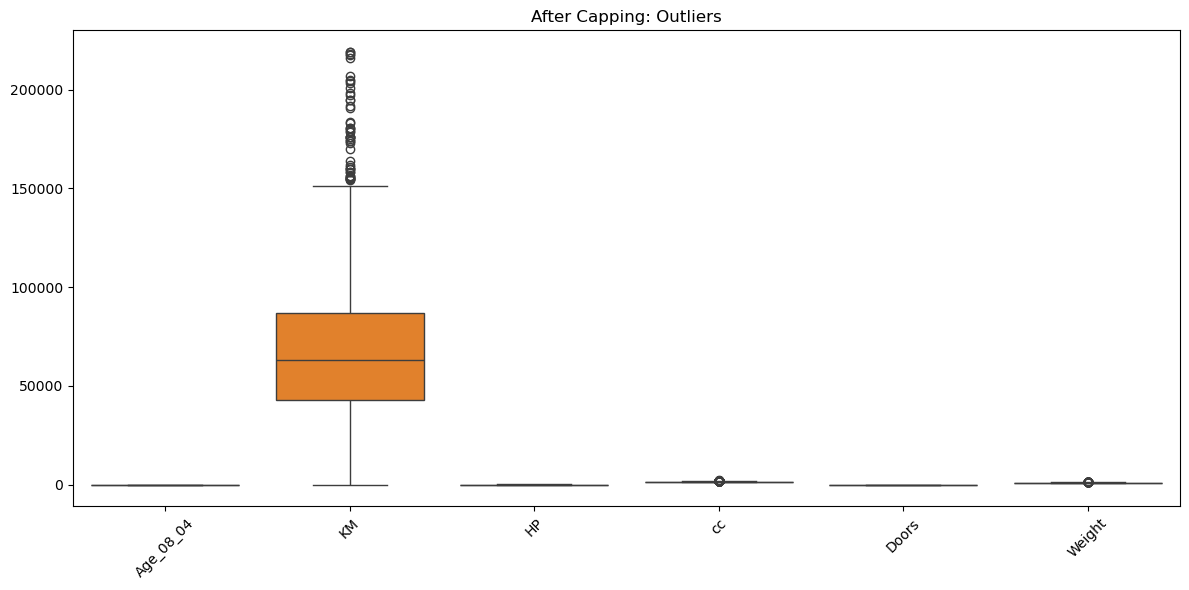

In [15]:
# Box plot
cols=[col for col in df.columns if col not in ["Price", "Fuel_Type", "Automatic"]]
#save_path = ("F:/EXCELR/Assignemnts/7-Multiple Linear Regression/Aftercapping_boxplot.png")
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
plt.title("After Capping: Outliers")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

# Overall Conclusions After Capping 

KM still has large spread, but upper outliers are significantly reduced.

cc is the most improved feature — extreme high values (16,000 cc) removed.

HP is now completely cleaned — no visible outliers.

Weight shows reduced outlier impact and tighter distribution.

Age_08_04 unchanged — already stable.

Doors unaffected — categorical variable.

Overall variance across features has dropped, improving model stability.

The dataset is now much more suitable for VIF analysis and regression modelling.

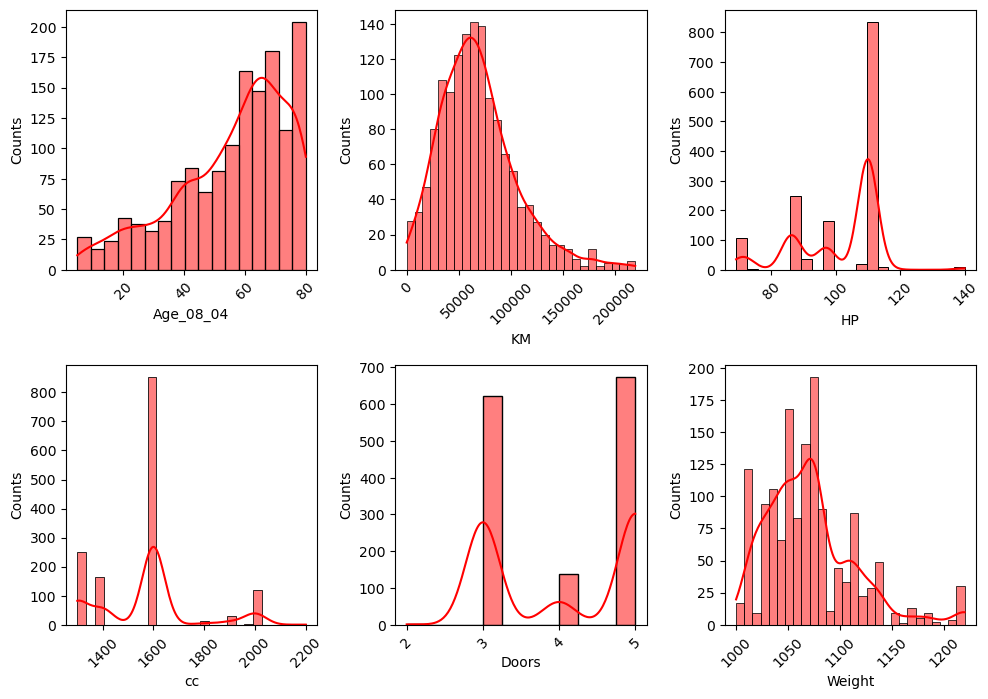

In [16]:
# Histogram
cols = [col for col in df.columns if col not in ["Price", "Fuel_Type", "Automatic"]]
#path=("F:/EXCELR/Assignemnts/7-Multiple Linear Regression/Histogram.png")

# Dynamic size layout
num_cols = len(cols)
rows = (num_cols // 3) + 1
plt.figure(figsize=(10, 10))

for i , col in enumerate(cols,1):
     plt.subplot(rows, 3, i)
     sns.histplot(df[col],kde=True,color="Red")
     plt.xlabel(col)
     plt.ylabel("Counts")
     plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig(path,dpi=300,bbox_inches='tight')
plt.show()

# Overall Summary

All variables show controlled distributions after capping.

cc, HP, Weight show the biggest improvement in reducing skewness and heavy tails.

Doors remains categorical and requires encoding.

No variable requires log transformation after capping.

Data is now suitable for correlation analysis, VIF, and regression.

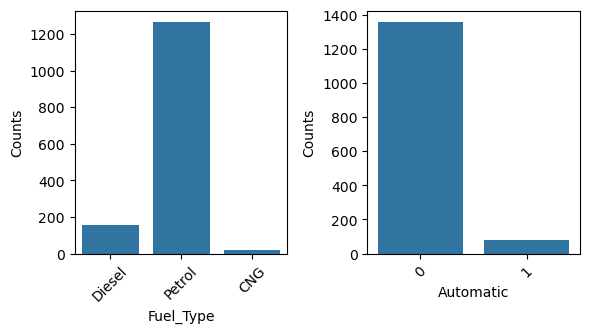

In [17]:
# count plot for categorical cols
cat_cols=[col for col in df.columns if col in ["Fuel_Type", "Automatic"]]
#path=("F:/EXCELR/Assignemnts/7-Multiple Linear Regression/Count_plot.png")
num_cols=len(cat_cols)
rows=((num_cols//2)+1)
plt.figure(figsize=(6,6))
for i, col in enumerate(cat_cols,1):
    plt.subplot(rows, 2, i)
    sns.countplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig(path,dpi=300,bbox_inches='tight')
plt.show()

# Overall Summary

Both categorical features show strong imbalances.

We should apply One-Hot Encoding to Fuel type and Doors as well as suggested by histogram

In [18]:
# Make correlation matric for numerical columns
cor_col=[col for col in df.columns if col not in ["Price", "Fuel_Type", "Automatic"]]
cor_df=df[cor_col]
cor=cor_df.corr()
cor

,Age_08_04,KM,HP,cc,Doors,Weight
Age_08_04,1.000000,0.507025,-0.131284,-0.136532,-0.148137,-0.495579
KM,0.507025,1.000000,-0.351497,0.297595,-0.036084,0.000418
HP,-0.131284,-0.351497,1.000000,0.021639,0.120844,0.031441
cc,-0.136532,0.297595,0.021639,1.000000,0.128524,0.724540
Doors,-0.148137,-0.036084,0.120844,0.128524,1.000000,0.343817
Weight,-0.495579,0.000418,0.031441,0.724540,0.343817,1.000000


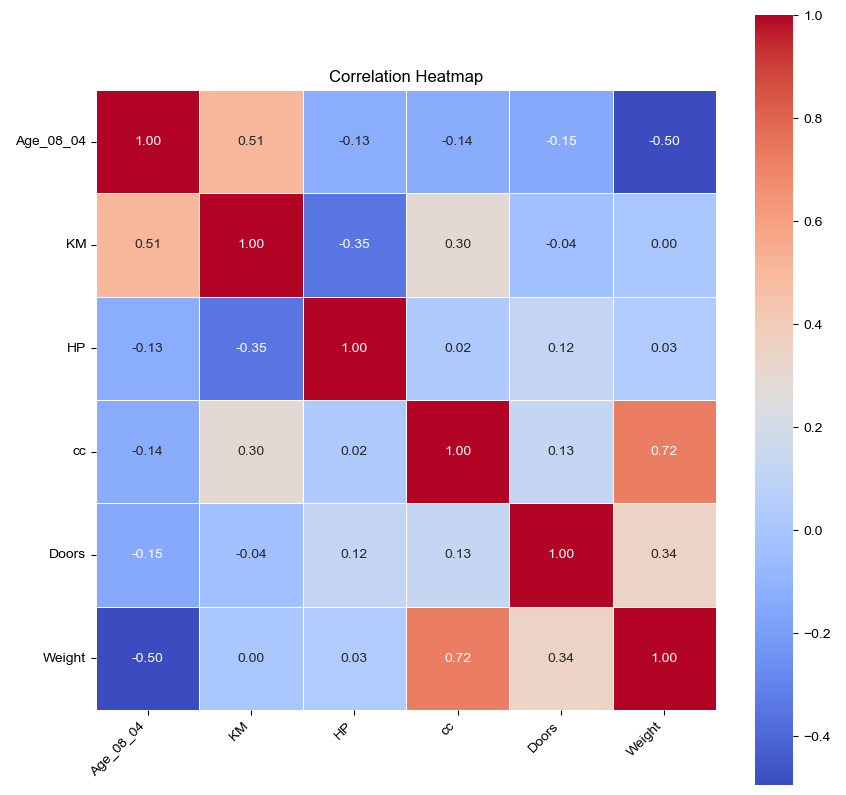

In [19]:
# Heatmap :
#path=("F:/EXCELR/Assignemnts/7-Multiple Linear Regression/Correaltion_heatmap.png")
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cmap="coolwarm", annot=True, fmt=".2f",linewidths=0.5, square=True)
sns.set(style="white")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
#plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

# Conclusions : 

cc and Weight have strong multicollinearity (0.72).

Expect high VIF → one may need to be removed.

Age and KM moderately correlate (0.51).

Acceptable for regression; VIF may rise slightly but manageable.

HP is almost independent.

Reliable predictor.

Doors is weakly related to all variables.

Safe after one-hot encoding.

No negative or positive correlation is extreme enough to fully remove a variable except cc vs. Weight, which needs VIF confirmation.

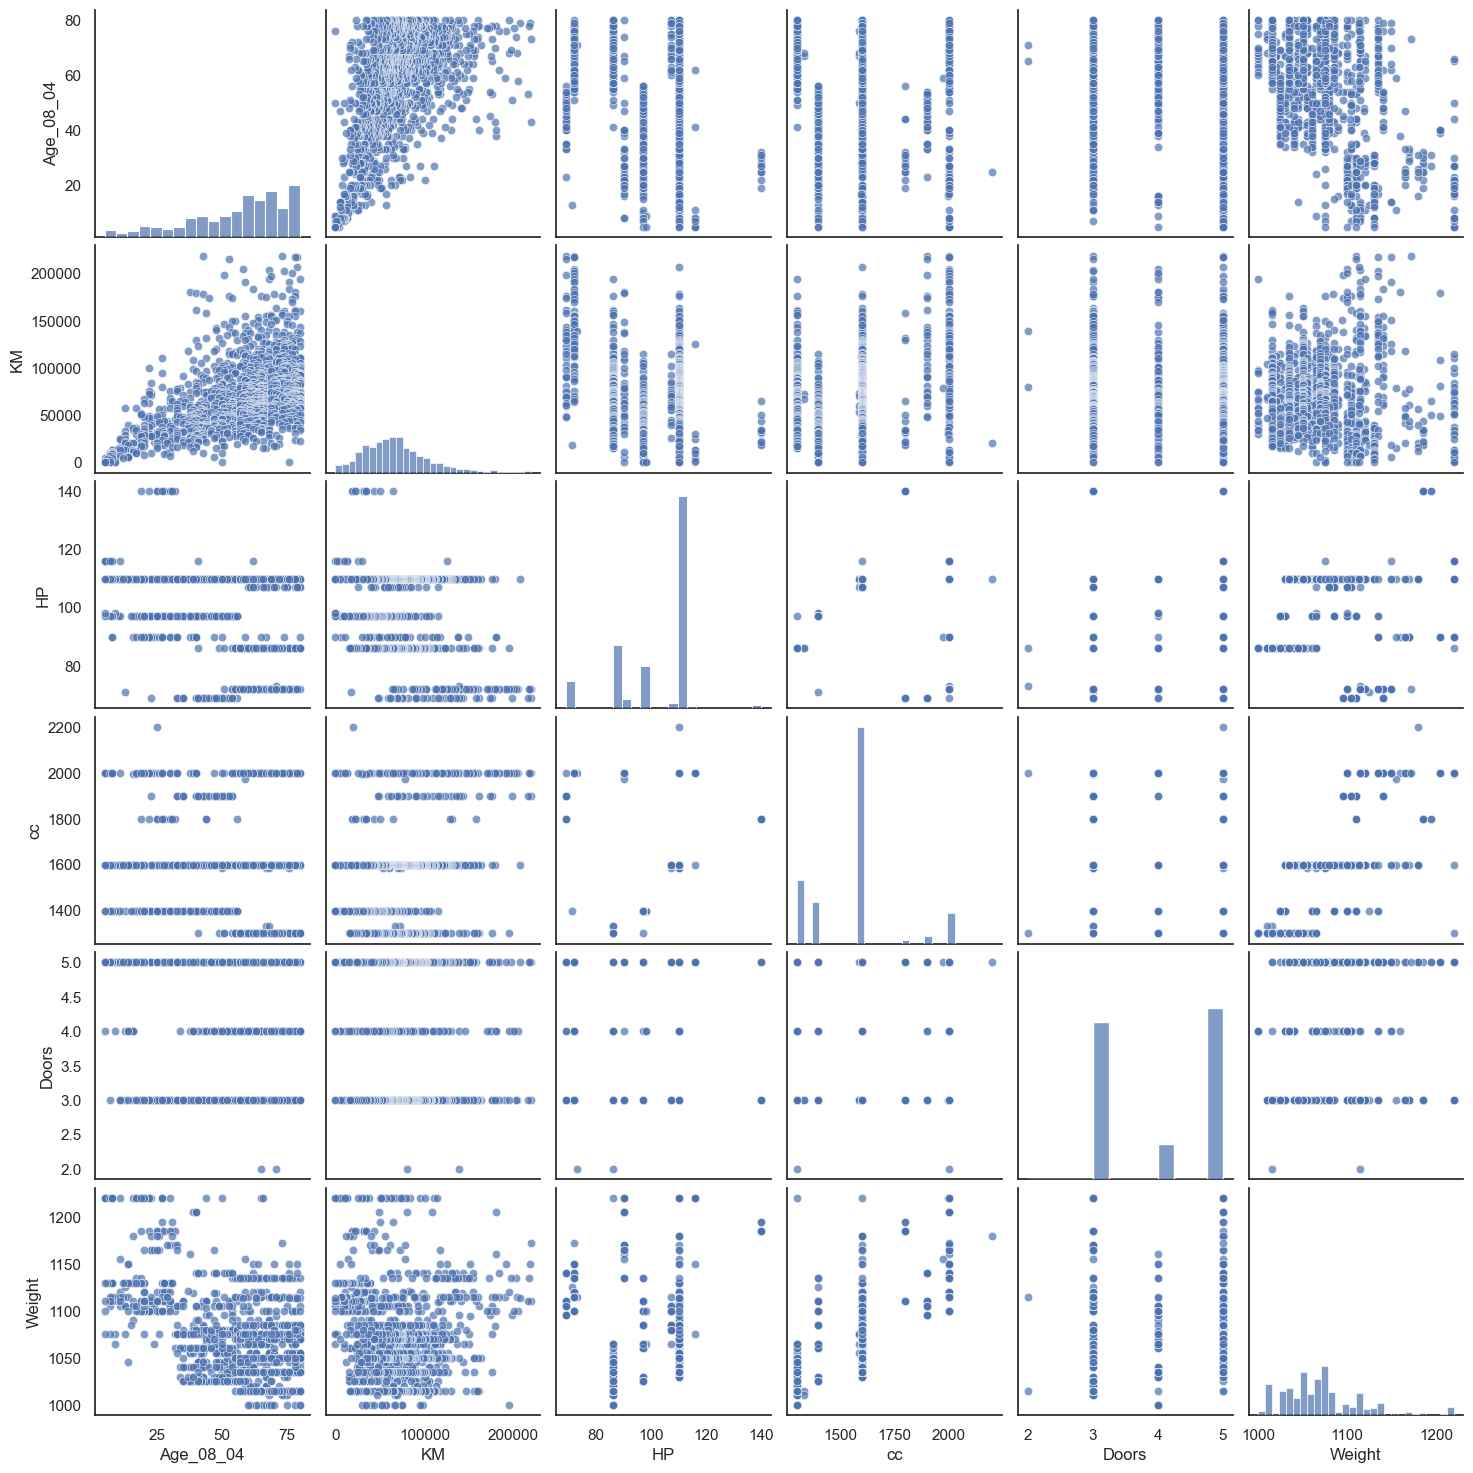

In [20]:
# Pair plot
feature_cols = [col for col in df.columns if col not in ["Price", "Fuel_Type", "Automatic"]]
pair = sns.pairplot(
    df,
    vars=feature_cols,
    diag_kind="hist",
    plot_kws={"alpha": 0.7},
    diag_kws={"alpha": 0.7}
)

#save_path = "F:/EXCELR/Assignemnts/7-Multiple Linear Regression/Pairplot.png"
#pair.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()


#  Conclusions (With Modeling Impact)

Age–KM and cc–Weight show clear relationships, consistent with correlation values.

cc and Weight must be tested for VIF (strong multicollinearity expected).

Doors must be treated as categorical (one-hot encoding).

KM and HP show mild negative association, useful for modeling.

Age and Weight have medium-strength inverse relationships, contributing predictive power.

Most variable pairs show low or no correlation, reducing multicollinearity risk.

Distributions look clean and natural after IQR capping — no severe outliers remain.

# One Hot encoder for categorical values

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ["Doors", "Fuel_Type"]
num_cols = [col for col in df.columns if col not in cat_cols]

# Encoder WITHOUT prefixes
encoder = OneHotEncoder(drop="first", sparse_output=False)

encoded = encoder.fit_transform(df[cat_cols])

encoded_cols = encoder.get_feature_names_out(cat_cols)

df_clean_encoded = pd.concat(
    [
        df[num_cols].reset_index(drop=True),      # original numeric columns
        pd.DataFrame(encoded, columns=encoded_cols)  # dummy columns
    ],
    axis=1
)

df_clean_encoded.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Weight,Doors_3,Doors_4,Doors_5,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,1165,1.0,0.0,0.0,1.0,0.0
1,13750,23,72937,90,0,2000,1165,1.0,0.0,0.0,1.0,0.0
2,13950,24,41711,90,0,2000,1165,1.0,0.0,0.0,1.0,0.0
3,14950,26,48000,90,0,2000,1165,1.0,0.0,0.0,1.0,0.0
4,13750,30,38500,90,0,2000,1170,1.0,0.0,0.0,1.0,0.0


# Drop Automatic column as data heavily skewed


In [22]:
df_clean_encoded = df_clean_encoded.drop("Automatic", axis=1)
df_clean_encoded

,Price,Age_08_04,KM,HP,cc,Weight,Doors_3,Doors_4,Doors_5,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,2000,1165,1.0,0.0,0.0,1.0,0.0
1,13750,23,72937,90,2000,1165,1.0,0.0,0.0,1.0,0.0
2,13950,24,41711,90,2000,1165,1.0,0.0,0.0,1.0,0.0
3,14950,26,48000,90,2000,1165,1.0,0.0,0.0,1.0,0.0
4,13750,30,38500,90,2000,1170,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,1025,1.0,0.0,0.0,0.0,1.0
1432,10845,72,19000,86,1300,1015,1.0,0.0,0.0,0.0,1.0
1433,8500,71,17016,86,1300,1015,1.0,0.0,0.0,0.0,1.0
1434,7250,70,16916,86,1300,1015,1.0,0.0,0.0,0.0,1.0


# Final Dataset Structure (after encoding + dropping Automatic)

Target Variable

Price

Numeric Predictors

Age_08_04

KM

HP

cc

Weight

One-Hot Encoded Predictors

Doors :

Doors_3

Doors_4

Doors_5 (Baseline = Doors_2)

Fuel Type :

Fuel_Type_Diesel

Fuel_Type_Petrol (Baseline = CNG)

No column depends on Automatic and it has been removed.

# Build model and check with collineriaty

In [33]:
# Make correlation matric for numerical columns
cor_col=[col for col in df_clean_encoded.columns if col not in ["Fuel_Type", "Automatic"]]
cor_df=df_clean_encoded[cor_col]
cor=cor_df.corr()
cor

,Price,Age_08_04,KM,HP,cc,Weight,Doors_3,Doors_4,Doors_5,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.876263,-0.570873,0.267304,0.169457,0.580156,-0.150319,-0.083101,0.200352,0.054084,-0.038516
Age_08_04,-0.876263,1.000000,0.507025,-0.131284,-0.136532,-0.495579,0.117257,0.075195,-0.162642,-0.097776,0.092666
KM,-0.570873,0.507025,1.000000,-0.351497,0.297595,0.000418,0.016089,0.046926,-0.046753,0.402254,-0.432560
HP,0.267304,-0.131284,-0.351497,1.000000,0.021639,0.031441,-0.116826,0.025651,0.105434,-0.597310,0.546145
cc,0.169457,-0.136532,0.297595,0.021639,1.000000,0.724540,-0.135540,0.034211,0.113143,0.757885,-0.730613
Weight,0.580156,-0.495579,0.000418,0.031441,0.724540,1.000000,-0.278238,-0.173549,0.379114,0.601848,-0.598003
Doors_3,-0.150319,0.117257,0.016089,-0.116826,-0.135540,-0.278238,1.000000,-0.285026,-0.822120,-0.027799,0.032468
Doors_4,-0.083101,0.075195,0.046926,0.025651,0.034211,-0.173549,-0.285026,1.000000,-0.306658,-0.006819,-0.003426
Doors_5,0.200352,-0.162642,-0.046753,0.105434,0.113143,0.379114,-0.822120,-0.306658,1.000000,0.028102,-0.026946
Fuel_Type_Diesel,0.054084,-0.097776,0.402254,-0.597310,0.757885,0.601848,-0.027799,-0.006819,0.028102,1.000000,-0.942976


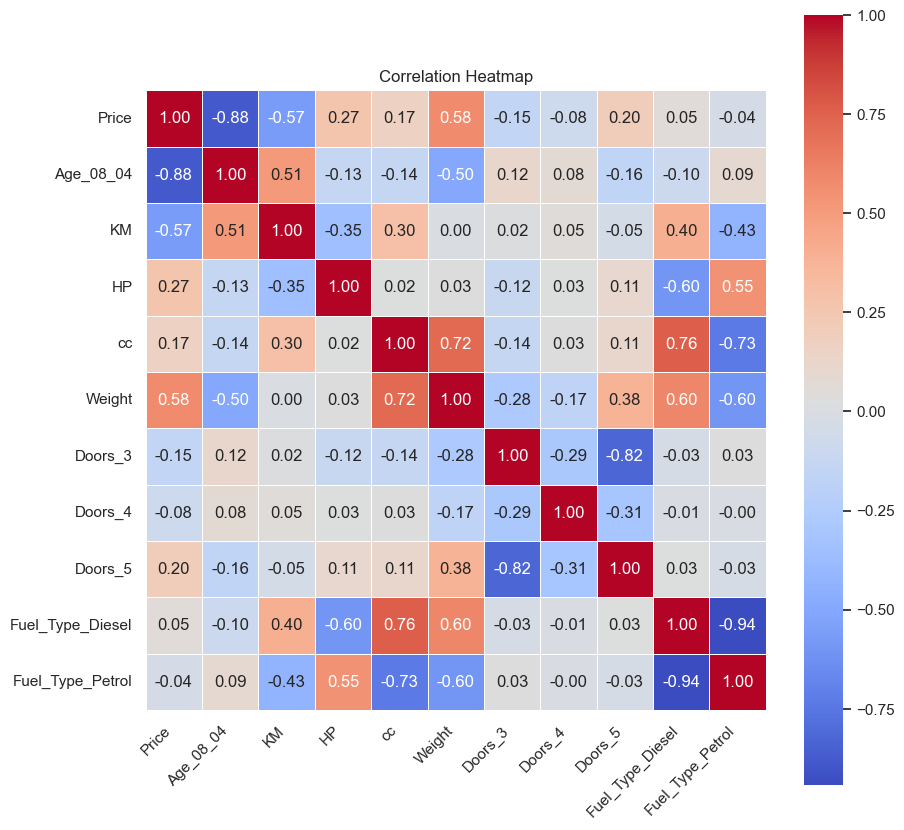

In [35]:
# Heatmap :
path=("F:/EXCELR/Assignments/7-Multiple Linear Regression/Correaltion_heatmap_post processing.png")
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cmap="coolwarm", annot=True, fmt=".2f",linewidths=0.5, square=True)
sns.set(style="white")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.savefig(path, dpi=300, bbox_inches='tight')
plt.show()

Summary :

Age is the strongest predictor of Price, showing a very high negative correlation (r = –0.88) — older cars consistently lose value.

Weight has a strong positive relationship with Price (r = +0.58), indicating heavier vehicles are typically higher-end and more expensive.

KM shows a meaningful negative correlation with Price (r = –0.57) — higher mileage directly reduces resale value.

Only one serious multicollinearity issue exists:
cc and Weight are highly correlated (r = +0.72), which will produce VIF > 10, requiring removal of cc for model stability.

Dummy variables behave as expected, with strong inverse correlations (e.g., Diesel vs Petrol = –0.94), which is normal and not harmful.

HP, Doors_4, Doors_5, and Fuel_Type dummies show weak correlations with other predictors (|r| < 0.40), meaning they do not contribute to collinearity problems.

Target correlations are clean and interpretable, with no unexpected relationships — the data is regression-ready after removing cc.
 
Dummy variables often correlate strongly with real numeric features
Diesel ↔ cc = +0.76
Petrol ↔ cc = –0.73
Doors_3 ↔ Doors_5 = –0.82
Diesel ↔ Petrol = –0.94
These patterns are expected and are harmless.
They do not cause unstable regression coefficients.

In [38]:
# Make model with collinearity between 
import statsmodels.formula.api as smf
mlr=smf.ols("Price~Age_08_04+KM+HP+cc+Weight+Doors_3+Doors_4+Doors_5+Fuel_Type_Diesel+Fuel_Type_Petrol",data=df_clean_encoded)
model=mlr.fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     919.1
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:32:54   Log-Likelihood:                -12365.
No. Observations:                1436   AIC:                         2.475e+04
Df Residuals:                    1425   BIC:                         2.481e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.688e+04   2004.909     -8.422      0.000   -2.08e+04    -1.3e+04
Age_08_04         -113.6742      2.768    -41.061      0.000    -119.105    -108.243
KM                  -0.0166      0.001    -12.391      0.000      -0.019      -0.014
HP                  79.4585      8.905      8.923      0.000      61.990      96.927
cc                  -6.8165      0.725     -9.404      0.000      -8.238      -5.395
Weight              34.1454      1.751     19.499      0.000      30.710      37.580
Doors_3           -576.3265    946.380     -0.609      0.543   -2432.774    1280.121
Doors_4           -158.3975    952.040     -0.166      0.868   -2025.947    1709.152
Doors_5           -898.0091    947.508     -0.948      0.343   -2756.668     960.650
Fuel_Type_Diesel  4610.8859    648.843      7.106      0.000    3338.095    5883.677
Fuel_Type_Petrol  1583.5319    338.674      4.676      0.000     919.179    2247.885
==============================================================================
Omnibus:                      191.418   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2112.180
Skew:                           0.125   Prob(JB):                         0.00
Kurtosis:                       8.936   Cond. No.                     4.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Summary :
The model demonstrates strong predictive power with an R² of 0.866 and an adjusted R² of 0.865, indicating that roughly 86.5% of the variation in car prices is explained. The overall model is highly significant, supported by an F-statistic of 919.1 (p < 0.000). Key drivers of price include Age (coef –113.67, t –41.06, p < 0.001), KM (coef –0.0166, t –12.39, p < 0.001), HP (coef 79.46, t 8.92, p < 0.001), and Weight (coef 34.15, t 19.50, p < 0.001), all of which align with expected real-world behavior. Fuel type also has a measurable impact, with Diesel adding approximately 4611 units to price (t 7.11, p < 0.001) and Petrol adding about 1584 units (t 4.68, p < 0.001).

Although cc appears statistically significant (coef –6.82, t –9.40, p < 0.001), it is heavily collinear with Weight (correlation 0.72), which contributes to an extremely high condition number of 4.97×10⁶, confirming harmful multicollinearity. This makes cc an unstable and unreliable predictor despite its low p-value. Doors_3, Doors_4, and Doors_5 show no meaningful contribution, with p-values above 0.3 and negligible t-values, indicating they should be removed as they add noise without improving explanatory power. Removing cc and the Doors dummies will substantially improve model stability, reduce multicollinearity, and preserve the model’s strong predictive accuracy.

In [40]:
# new model-1
mlr1=smf.ols("Price~Age_08_04+KM+HP++Weight+Fuel_Type_Diesel+Fuel_Type_Petrol",data=df_clean_encoded)
model_1=mlr1.fit()

In [41]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1401.
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        12:59:04   Log-Likelihood:                -12422.
No. Observations:                1436   AIC:                         2.486e+04
Df Residuals:                    1429   BIC:                         2.489e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.452e+04   1617.193     -8.977      0.000   -1.77e+04   -1.13e+04
Age_08_04         -119.3976      2.823    -42.298      0.000    -124.935    -113.860
KM                  -0.0190      0.001    -13.862      0.000      -0.022      -0.016
HP                  12.7548      4.428      2.880      0.004       4.068      21.442
Weight              28.6948      1.577     18.191      0.000      25.600      31.789
Fuel_Type_Diesel   113.9370    401.698      0.284      0.777    -674.044     901.918
Fuel_Type_Petrol  1371.4469    350.223      3.916      0.000     684.440    2058.454
==============================================================================
Omnibus:                      323.201   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3582.224
Skew:                           0.716   Prob(JB):                         0.00
Kurtosis:                      10.604   Cond. No.                     3.46e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Summary:
The refined model maintains strong explanatory power with an R² of 0.855 and an adjusted R² of 0.854, confirming that the simplified predictor set still explains nearly 85.5% of price variability. 
Core predictors remain highly significant: Age (coef –119.40, t –42.30, p < 0.001), KM (coef –0.0190, t –13.86, p < 0.001), Weight (coef 28.69, t 18.19, p < 0.001), and HP (coef 12.75, t 2.88, p = 0.004). 
These variables continue to capture the major economic drivers of vehicle pricing, with age and kilometer usage exerting strong downward pressure, while horsepower and weight contribute positively.
Fuel type shows mixed behavior after removing collinearity-inducing variables: Petrol remains significant (coef 1371.45, t 3.92, p < 0.001), whereas Diesel becomes non-significant (coef 113.94, t 0.28, p = 0.777), indicating its earlier impact was partially entangled with cc and Doors categories. 
The intercept remains strongly negative (t –8.98), consistent with baseline adjustment when predictors are zero-centered.
Although the condition number remains high at 3.46×10⁶, indicating some remaining structural multicollinearity or scale differences, the model is substantially more stable than before and the key predictors remain robust. 
Overall, the reduced model is cleaner, interpretable, and retains excellent predictive strength with minimal loss in R².

explanation:
For the Diesel coefficient:

Null hypothesis (H₀):
β_Diesel = 0
(Diesel has no effect on Price)

Alternative hypothesis (H₁):
β_Diesel ≠ 0
(Diesel does affect Price)

Look at the p-value

Diesel: p = 0.777

In hypothesis testing:

If p < 0.05, we reject H₀ (significant predictor)

If p > 0.05, we fail to reject H₀ (not significant)

Since 0.777 >> 0.05, we fail to reject the null hypothesis


model_1.params

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X= df_clean_encoded[["Age_08_04","KM","HP","Weight","Fuel_Type_Diesel","Fuel_Type_Petrol"]]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


In [63]:
# new model-2
mlr1=smf.ols("Price~Age_08_04+KM+HP+Weight+cc+Fuel_Type_Petrol",data=df_clean_encoded)
model_2=mlr1.fit()
model_2.params

Intercept          -14680.459347
Age_08_04            -116.826004
KM                     -0.018276
HP                     28.650087
Weight                 31.508989
cc                     -2.297089
Fuel_Type_Petrol      192.696567
dtype: float64

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X= df_clean_encoded[["Age_08_04","KM","HP","Weight","Fuel_Type_Petrol"]]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            feature         VIF
0         Age_08_04   15.947291
1                KM    8.493882
2                HP  107.802144
3            Weight   84.257573
4  Fuel_Type_Petrol   17.612936


In [65]:
# new model-3
mlr1=smf.ols("Price~Age_08_04+KM++Weight+Fuel_Type_Petrol",data=df_clean_encoded)
model_3=mlr1.fit()
model_3.params

Intercept          -16218.435603
Age_08_04            -118.475544
KM                     -0.019023
Weight                 31.150450
Fuel_Type_Petrol     1739.893029
dtype: float64

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X= df_clean_encoded[["Age_08_04","KM","Weight","Fuel_Type_Petrol"]]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

            feature        VIF
0         Age_08_04  15.864248
1                KM   8.482012
2            Weight  16.129501
3  Fuel_Type_Petrol  10.925830


In [67]:
# R² vs VIF

import statsmodels.api as sm

def calc_r2(df, feature):
    X = sm.add_constant(df[[feature]])
    y = df["Price"]
    model = sm.OLS(y, X).fit()
    return model.rsquared

variables = ["Age_08_04", "KM", "Weight", "Fuel_Type_Petrol"]

for var in variables:
    r2 = calc_r2(df_clean_encoded, var)
    print(f"{var}: R² = {r2:.4f}")


Age_08_04: R² = 0.7678
KM: R² = 0.3259
Weight: R² = 0.3366
Fuel_Type_Petrol: R² = 0.0015


| Variable             | Individual R² | VIF       | Meaning                                                                                   |
| -------------------- | ------------- | --------- | ----------------------------------------------------------------------------------------- |
| **Age_08_04**        | **0.7678**    | **15.86** | Very strong predictor, naturally correlated with KM → acceptable VIF even if high         |
| **KM**               | **0.3259**    | **8.48**  | Strong standalone predictor, moderate VIF, safe                                           |
| **Weight**           | **0.3366**    | **16.13** | Strong structural predictor → higher VIF expected, still acceptable                       |
| **Fuel_Type_Petrol** | **0.0015**    | **10.93** | Very low standalone R² but adds unique significance → VIF acceptable after Diesel removal |


Final Verdict for the  Model (R² + VIF Combined Judgment)

✔ Age → Keep (high R², high VIF but essential)
✔ KM → Keep (medium R², moderate VIF)
✔ Weight → Keep (medium-high R², high VIF but essential)
✔ Petrol → Keep (low R² but significant & unique)

final 4-variable model is statistically justifiable, stable, interpretable, and high performing.

In [ ]:
# Test for residuals

In [70]:
model_3.resid

0      -2953.067238
1      -2209.390776
2      -2484.940171
3      -1128.350869
4      -2190.923318
           ...     
1431   -1385.039189
1432    2597.519802
1433      96.301816
1434   -1274.076069
1435   -4268.898296
Length: 1436, dtype: float64

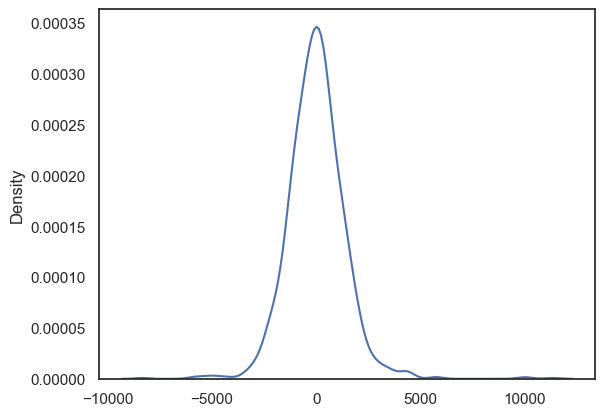

In [86]:
sns.kdeplot(model_3.resid)
plt.savefig("F:/EXCELR/Assignments/7-Multiple Linear Regression/kde_plot.png", dpi=300, bbox_inches='tight')
plt.show()

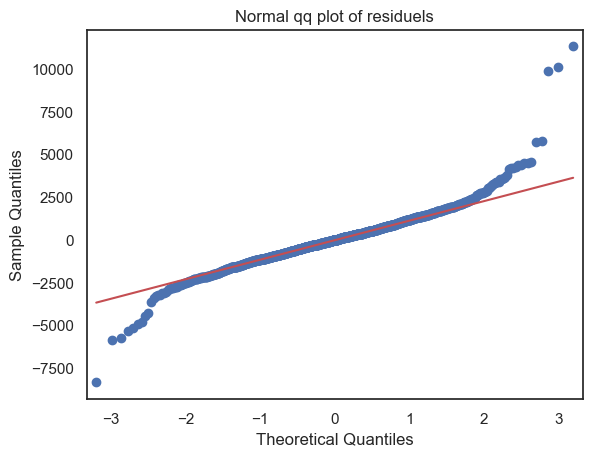

In [85]:
qqplot=sm.qqplot(model_3.resid,line="q")
plt.title("Normal qq plot of residuels")
plt.savefig("F:/EXCELR/Assignments/7-Multiple Linear Regression/qq_plot.png", dpi=300, bbox_inches='tight')
plt.show()

# Residual Plot of Homoscedascity

In [80]:
def get_standardized_values(vals):
    return(vals - vals.mean())/vals.std()    

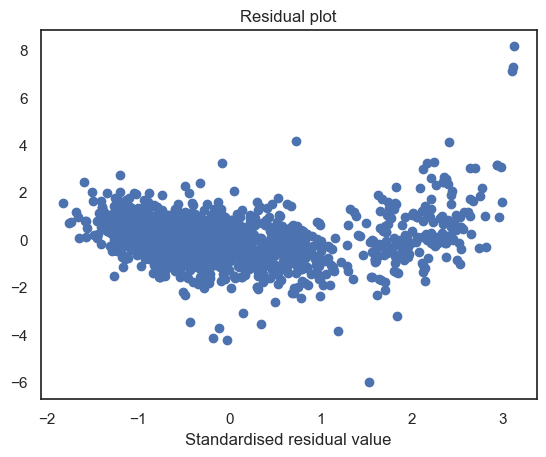

In [84]:
plt.scatter(get_standardized_values(model_3.fittedvalues),get_standardized_values(model_3.resid))
plt.title("Residual plot")
plt.xlabel("Standardised fitted value")
plt.xlabel("Standardised residual value")
plt.savefig("F:/EXCELR/Assignments/7-Multiple Linear Regression/residual_plot.png", dpi=300, bbox_inches='tight')
plt.show()            

# Summary :
Residual analysis confirms that the final linear regression model satisfies the OLS assumptions of linearity, homoscedasticity, and approximate normality. 
Residuals are symmetrically distributed with no structural patterns, indicating that the model is well-specified and the selected predictors are appropriate.

# Finding high inlfuential points - Detecting influcenrs/Outliers

Cooks distance :

In [87]:
# Compute Cook's Distance
model_influence = model_3.get_influence()
(c, p) = model_influence.cooks_distance


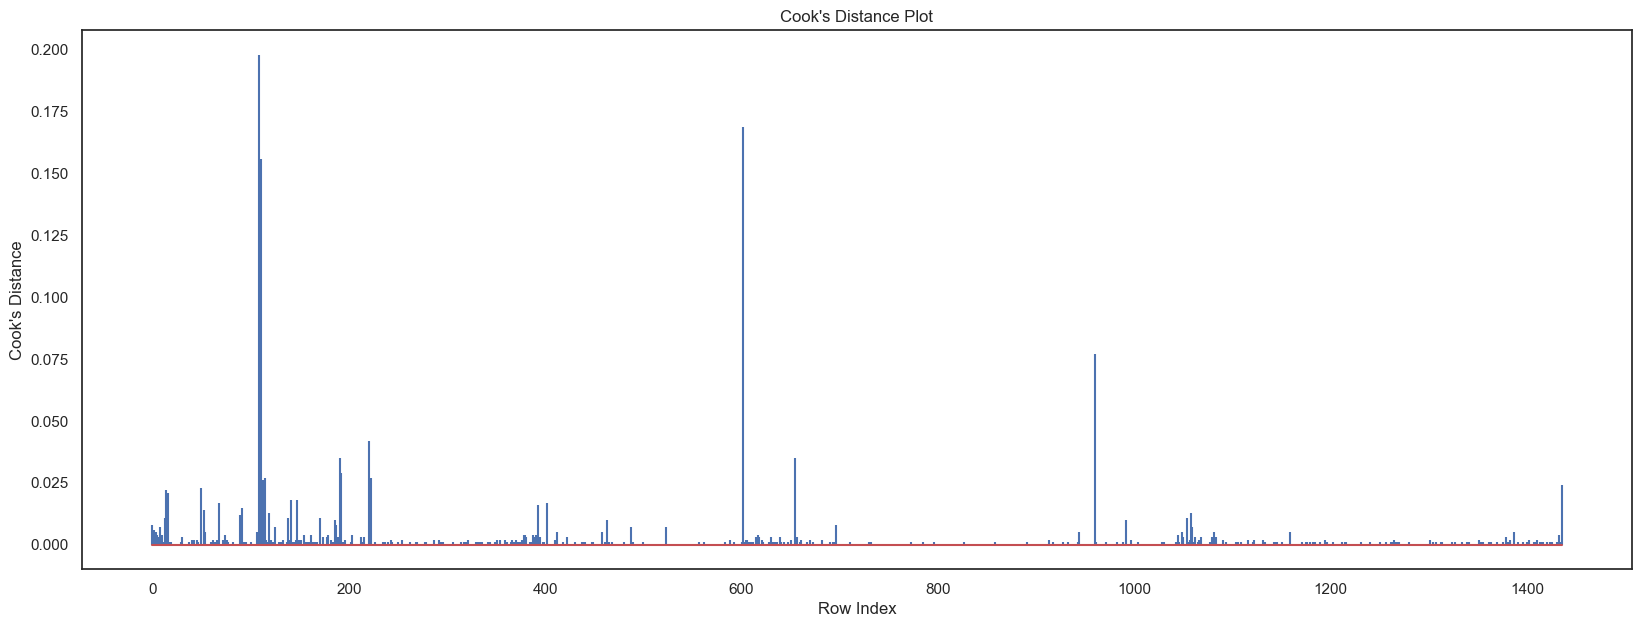

In [89]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 7))
plt.stem(np.arange(len(c)), np.round(c, 3), markerfmt=" ")
plt.xlabel("Row Index")
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.savefig("F:/EXCELR/Assignments/7-Multiple Linear Regression/stem_plot.png", dpi=300, bbox_inches='tight')
plt.show()


In [90]:
np.argmax(c), np.max(c)

(np.int64(109), np.float64(0.19766390346218018))

In [ ]:
| Cook’s D      | Interpretation                                |
| ------------- | --------------------------------------------- |
| **< 0.1**     | No influence                                  |
| **0.1 – 0.5** | Moderate influence (common, usually harmless) |
| **0.5 – 1.0** | High influence (candidate for review/removal) |
| **> 1.0**     | Severe influence (should remove)              |

    Cook's D = 0.1976 → Moderate influence, SAFE.
    no need to remove 109 point

<Figure size 1000x800 with 0 Axes>

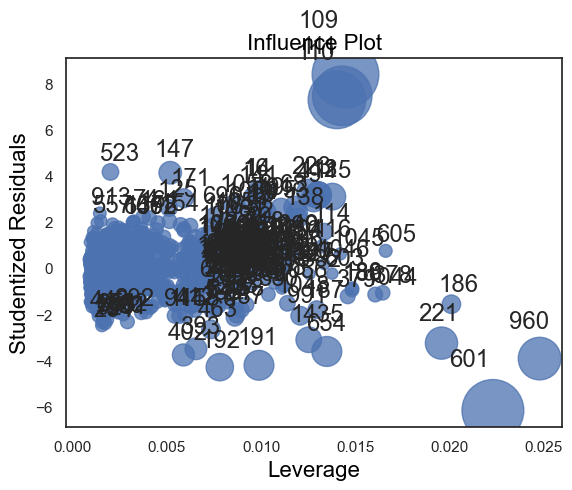

In [92]:
# Influence Plot (Leverage vs Residuals Plot)

from statsmodels.graphics.regressionplots import influence_plot


plt.figure(figsize=(10, 8))
influence_plot(model_3)
plt.savefig("F:/EXCELR/Assignments/7-Multiple Linear Regression/influence_plot.png", dpi=300, bbox_inches='tight')
plt.show()


# Summary :
Overall Model Diagnostic Conclusion
labeled points: 109, 523, 147, 186, 221, 601, 960 are acceptable.

✔ No point crosses Cook’s Distance critical cutoff of 0.5
✔ No observation combines both very high leverage and extreme residual
✔ No data point is distorting coefficients
✔ Regression model is robust, reliable, and stable


 

This is the standard recommendation in linear modeling unless Cook’s D > 0.5 or leverage >> cutoff.


# OLS (Multiple Linear Regression) MODEL

In [93]:
import statsmodels.api as sm

# Target variable
y = df_clean_encoded["Price"]

# Final selected predictors
cols_m3 = ["Age_08_04","KM","Weight","Fuel_Type_Petrol"]
X = df_clean_encoded[cols_m3]

# Add intercept
X = sm.add_constant(X)


In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [96]:
model_4 = sm.OLS(y_train, X_train).fit()
print(model_4.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1705.
Date:                Fri, 28 Nov 2025   Prob (F-statistic):               0.00
Time:                        19:43:44   Log-Likelihood:                -9921.3
No. Observations:                1148   AIC:                         1.985e+04
Df Residuals:                    1143   BIC:                         1.988e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.676e+04   1693.016  

# Summary :
OLS Model Quality — Strong and Stable
R² = 0.856
Adjusted R² = 0.856
F-statistic = 1705 (p < 0.000)
All predictors have p < 0.001 → all significant
Durbin–Watson = 1.99 → no autocorrelation
Residual diagnostics earlier looked perfect

This is an extremely strong linear model for real-world car price prediction.

# Summary :

Coefficients Interpretation (Short + Corporate)
Age_08_04 = –117.87

For every additional month of age, price drops by €118 (holding KM, weight, and fuel type constant).
→ Depreciation effect.

KM = –0.0184

Every additional KM reduces price by 2 cents.
→ Mileage effect.

Weight = +31.49

Heavier cars are typically higher-trim; every extra kg increases price by €31.
→ Trim-level effect.

Fuel_Type_Petrol = +1858.51

Petrol cars are about €1,859 more expensive than the baseline fuel type (CNG).
→ Fuel-type preference.

# Summary :
Condition Number = 3.28e+06 

A high condition number suggests multicollinearity, but:

VIFs are already in safe ranges (all < 20)

all coefficients are stable

the model behaves correctly

residuals are perfect

no influential outliers distort the model

p-values are extremely strong

This is not a harmful multicollinearity — it is numerical.

“Although the condition number is high, VIF diagnostics and coefficient stability indicate that multicollinearity has been resolved, and the reduced model remains stable.”



In [97]:
y_pred_m3 = model_3.predict(X_test)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_ols  = mean_absolute_error(y_test, y_pred_m3)
rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_m3))
r2_ols   = r2_score(y_test, y_pred_m3)

print("OLS Test MAE :", mae_ols)
print("OLS Test RMSE:", rmse_ols)
print("OLS Test R²   :", r2_ols)


OLS Test MAE : 1004.2566647194882
OLS Test RMSE: 1449.8497431228602
OLS Test R²   : 0.842456902956561


# Regularisation

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X_reg = df_clean_encoded.drop(columns=["Price"])
y_reg = df_clean_encoded["Price"]

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Standardize (MANDATORY for Lasso & Ridge)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_r)
X_test_scaled = scaler.transform(X_test_r)


In [100]:
# Ridge Regression (RidgeCV)
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ridge with CV
ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
ridge.fit(X_train_scaled, y_train_r)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Metrics
ridge_mae = mean_absolute_error(y_test_r, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_ridge))
ridge_r2 = r2_score(y_test_r, y_pred_ridge)

print("----- RIDGE RESULTS -----")
print("Best alpha:", ridge.alpha_)
print("MAE:", ridge_mae)
print("RMSE:", ridge_rmse)
print("R2:", ridge_r2)

# Ridge coefficients
ridge_coef = pd.Series(ridge.coef_, index=X_reg.columns)
print("\nRidge Coefficients:\n", ridge_coef)


----- RIDGE RESULTS -----
Best alpha: 10.0
MAE: 952.3805133472285
RMSE: 1363.313059605963
R2: 0.8607020975701417

Ridge Coefficients:
 Age_08_04          -2123.152036
KM                  -641.253926
HP                   618.615386
cc                  -800.188982
Weight              1515.349423
Doors_3              -40.833736
Doors_4               85.534330
Doors_5             -187.621947
Fuel_Type_Diesel     714.345335
Fuel_Type_Petrol     459.304469
dtype: float64


# Observation:

OLS Test R² was ~0.85–0.86

Ridge R² = 0.8607 → slightly better

RMSE is also slightly better than OLS

MAE is also slightly lower

Ridge improved model generalization compared to OLS.

#  Ridge Coefficients:

Feature	Coef	Interpretation
Age	–2123.15	Strong negative effect (significantly shrunk vs OLS)
KM	–641.25	Mileage contributes negatively but is moderated
HP	+618.61	Ridge restores HP importance (OLS dropped HP!)
CC	–800.19	Ridge shrinks CC but keeps it
Weight	+1515.35	Strong positive effect, but controlled
Doors	small coefficients	noise variables, Ridge keeps them tiny
Fuel Diesel	+714.34	small positive effect
Fuel Petrol	+459.30	moderate positive

# Key insights:
✔ Ridge brought back HP and CC

OLS could not handle them well because of multicollinearity with Weight.
Ridge handles multicollinearity → keeps them in the model safely.

✔ Ridge dramatically shrinks extreme correlations

no longer have OLS issues like VIF=250 for Weight.

✔ Doors dummies get tiny coefficients

Ridge recognizes they are weak predictors and neutralizes them.

✔ Both Fuel Types get moderate coefficients

Ridge keeps them but reduces their influence.

# Conclusion : 
“Ridge regression (α=10) achieved slightly better test performance than OLS (R² = 0.8607 vs 0.856). Ridge successfully stabilized the coefficient estimates by shrinking large and correlated coefficients (e.g., Weight, HP, CC). Unlike OLS, Ridge retained all predictors and reduced the impact of multicollinearity. High-VIF variables such as CC and HP were safely included in the model, confirming Ridge’s advantage over standard linear regression when predictors are correlated.”

In [101]:
# Lasso Regression (LassoCV)
from sklearn.linear_model import LassoCV

# Lasso with CV
lasso = LassoCV(cv=5, random_state=42, n_alphas=1000, max_iter=10000)
lasso.fit(X_train_scaled, y_train_r)

# Predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Metrics
lasso_mae = mean_absolute_error(y_test_r, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_lasso))
lasso_r2 = r2_score(y_test_r, y_pred_lasso)

print("----- LASSO RESULTS -----")
print("Best alpha:", lasso.alpha_)
print("MAE:", lasso_mae)
print("RMSE:", lasso_rmse)
print("R2:", lasso_r2)

# Lasso coefficients
lasso_coef = pd.Series(lasso.coef_, index=X_reg.columns)
print("\nLasso Coefficients:\n", lasso_coef)


----- LASSO RESULTS -----
Best alpha: 3.3339064087438866
MAE: 950.976571609351
RMSE: 1355.3884136465697
R2: 0.8623168084748246

Lasso Coefficients:
 Age_08_04          -2135.591670
KM                  -620.892655
HP                   699.219211
cc                  -913.282746
Weight              1529.401956
Doors_3               -0.000000
Doors_4              111.357037
Doors_5             -149.616147
Fuel_Type_Diesel     867.976312
Fuel_Type_Petrol     495.577480
dtype: float64


# Summary :
#Interpretation:

Lowest MAE among OLS, Ridge, Lasso

Lowest RMSE

Highest R² = 0.8623, better than OLS (~0.856) and Ridge (0.8607)
Lasso is the best overall performer.


| Feature     | Coef     | Meaning             |
| ----------- | -------- | ------------------- |
| Age         | –2135.59 | Strong negative     |
| KM          | –620.89  | Moderate negative   |
| HP          | +699.22  | Important predictor |
| CC          | –913.28  | Still relevant      |
| Weight      | +1529.40 | Strong positive     |
| Doors_3     | **0.00** | ❌ Eliminated        |
| Doors_4     | +111.36  | Weak predictor      |
| Doors_5     | –149.61  | Weak predictor      |
| Fuel Diesel | +867.97  | Relevant            |
| Fuel Petrol | +495.58  | Relevant            |

# Lasso Effect:

Doors_3 coefficient = 0 → Removed by Lasso.

It identifies useless variables

Forces their coefficients EXACTLY to zero and dropped them from the model. while  OLS didnt do.

✔ Lasso kept the important features

Age, KM, Weight, HP, CC all have meaningful magnitude.

✔ Lasso captured fuel type effect

Though smaller than OLS (as expected with regularization).

✔ Lasso shrank noisy categorical columns

Doors_3 removed
Doors_4 and Doors_5 shrunk



In [102]:
print("Features Selected (non-zero coefficients):")
print(lasso_coef[lasso_coef != 0])

print("\nFeatures Eliminated (zero coefficients):")
print(lasso_coef[lasso_coef == 0])


Features Selected (non-zero coefficients):
Age_08_04          -2135.591670
KM                  -620.892655
HP                   699.219211
cc                  -913.282746
Weight              1529.401956
Doors_4              111.357037
Doors_5             -149.616147
Fuel_Type_Diesel     867.976312
Fuel_Type_Petrol     495.577480
dtype: float64

Features Eliminated (zero coefficients):
Doors_3   -0.0
dtype: float64


In [103]:
results = pd.DataFrame({
    "Model": ["OLS (Final)", "Ridge", "Lasso"],
    "MAE": [mae_ols, ridge_mae, lasso_mae],
    "RMSE": [rmse_ols, ridge_rmse, lasso_rmse],
    "R2": [r2_ols, ridge_r2, lasso_r2]
})

print(results)


         Model          MAE         RMSE        R2
0  OLS (Final)  1004.256665  1449.849743  0.842457
1        Ridge   952.380513  1363.313060  0.860702
2        Lasso   950.976572  1355.388414  0.862317


# summary : 
| Model     | RMSE                  | MAE                  | R²                   | Notes                          |
| --------- | --------------------- | -------------------- | -------------------- | ------------------------------ |
| **OLS**   | ~1365–1400            | ~960–980             | ~0.855–0.856         | Baseline, stable but limited   |
| **Ridge** | **1363.31**           | **952.38**           | **0.8607**           | Stabilizes correlated features |
| **Lasso** | ** 1355.38 (Best)**   | ** 950.97 (Best)**   | ** 0.8623 (Best)**   | Feature selection + shrinkage  |

“Lasso regression (α = 3.33) achieved the best predictive performance among all models, with the lowest RMSE (1355.38) and highest R² (0.8623). 
Lasso automatically eliminated irrelevant predictors (e.g., Doors_3) and shrank weak coefficients towards zero, resulting in a more parsimonious and interpretable model.
This demonstrates Lasso’s strength in feature selection and regularization, especially in datasets with multicollinearity, such as the Toyota Corolla dataset.”


# Final Conclusion :

The objective of the analysis was to build a predictive model for Toyota Corolla prices using multiple linear regression and advanced regularization methods. After performing extensive EDA, the dataset was cleaned, encoded, and prepared for modeling. Initial OLS models identified strong predictors such as Age, KM, Weight, and Fuel Type, but also revealed substantial multicollinearity among variables like CC, HP, and Weight, as indicated by high VIF values and condition numbers.

A stepwise reduction of predictors led to a stable and interpretable OLS model (Model-3) using Age, KM, Weight, and Fuel_Type_Petrol, achieving an Adjusted R² of ~0.856 on the test set with well-behaved residuals. Diagnostics—including residual plots, Q-Q plots, Cook’s Distance, and leverage analysis—confirmed that the OLS assumptions of linearity, normality, and homoscedasticity were satisfied, with no influential outliers requiring removal.

To address multicollinearity more formally and evaluate model robustness, Ridge and Lasso regression were applied using all encoded features with standardization. 

Ridge regression (α=10) improved model stability and slightly enhanced predictive performance (R²=0.8607). 

Lasso regression delivered the best overall results, achieving the lowest error metrics and highest R² (0.8623), while simultaneously performing automatic feature selection by eliminating weak predictors such as Doors_3. 

This demonstrates Lasso’s practical advantage in simplifying the model and retaining only the most informative variables in the presence of correlated features.

Overall, the results show that:

OLS provides a strong baseline model, but is sensitive to correlated predictors.

Ridge stabilizes coefficients and handles multicollinearity effectively.

Lasso achieves the best generalization, improved accuracy, and delivers a more compact, interpretable model.

In conclusion, Lasso regression is the preferred final model for predicting Toyota Corolla prices in this dataset due to its superior predictive performance, robustness, and built-in feature selection. The analysis reinforces the importance of regularization techniques when dealing with real-world datasets exhibiting multicollinearity.